In [1]:
import matplotlib.pyplot as plt 
import time
import random

from src.problem import MultiODProblem
from src.gurobi.gurobi_formulation import formulation
from src.gurobi.utils import display_gurobi_result, generate_paths_from_gurobi_result

In [2]:
# record time taken for solving the problem
# record the solution cost
def gurobi_sol(num_O):
    
    start_time = time.time()
    p = MultiODProblem(num_O, 1, random.seed(start_time))
    X, m = formulation(p, '2D')
    m.optimize()
    end_time = time.time()
    
    fig = display_gurobi_result(X, m, p)
    plt.show()
    paths = generate_paths_from_gurobi_result(X)
    execution_time = end_time - start_time
    
    print("\n\nSolution Report \n")
    print(f"The path is: {paths}")
    print(f"The solution is feasible: {p.is_feasible(paths)}")
    print(f"The solution cost is: {m.objVal}")
    print(f"Execution time: {execution_time} seconds")
    

In [3]:
# gurobi_sol(20)

In [4]:
p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
X, m = formulation(p, '2D')
m.optimize()

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 351 rows, 342 columns and 1786 nonzeros
Model fingerprint: 0x2dcc1703
Variable types: 18 continuous, 324 integer (324 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+01]
Presolve removed 85 rows and 61 columns
Presolve time: 0.00s
Presolved: 266 rows, 281 columns, 1297 nonzeros
Variable types: 16 continuous, 265 integer (265 binary)
Found heuristic solution: objective 709.0000000

Root relaxation: objective 2.305882e+02, 78 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

  

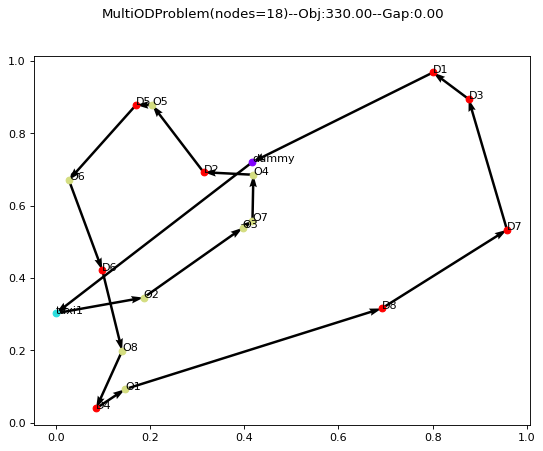

In [5]:
fig = display_gurobi_result(X, m, p)
plt.show()

In [6]:
paths = generate_paths_from_gurobi_result(X)

In [7]:
paths

[[0, 1, 3, 4, 8, 5, 11, 6, 14, 7, 15, 9, 13, 2, 17, 16, 12, 10, 0]]

In [8]:
p.is_feasible(paths)

True